In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from utils import get_class_dist

In [2]:
# Load the dataset
df = pd.read_csv("data/hospital_stay_data.csv")

# Display the first few rows of the dataset
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
# Display statistical summary of the dataset
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [5]:
# Display columns in the dataset
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [6]:
# Check for missing values in the dataset
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette='viridis')


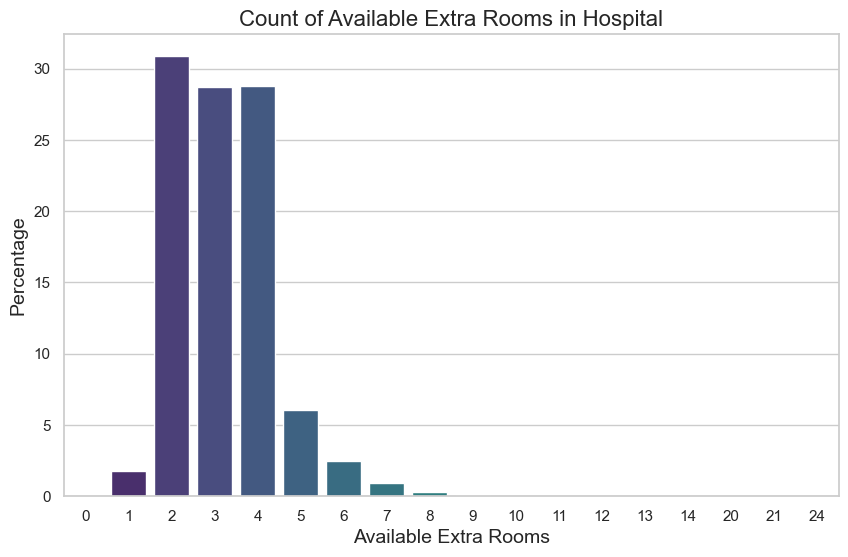

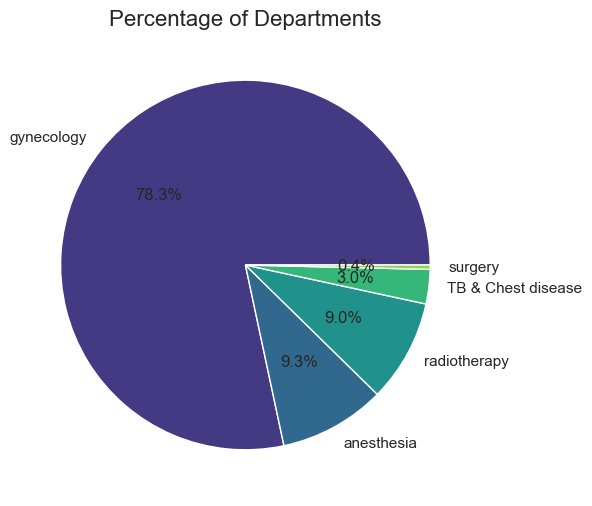

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette='viridis')


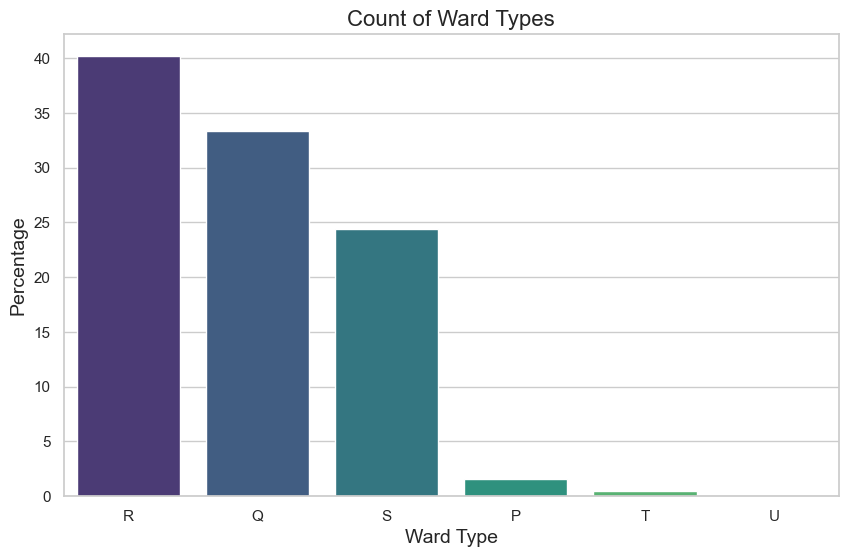

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bed_grade_count.index, x=bed_grade_count.values, palette='viridis', orient='h')


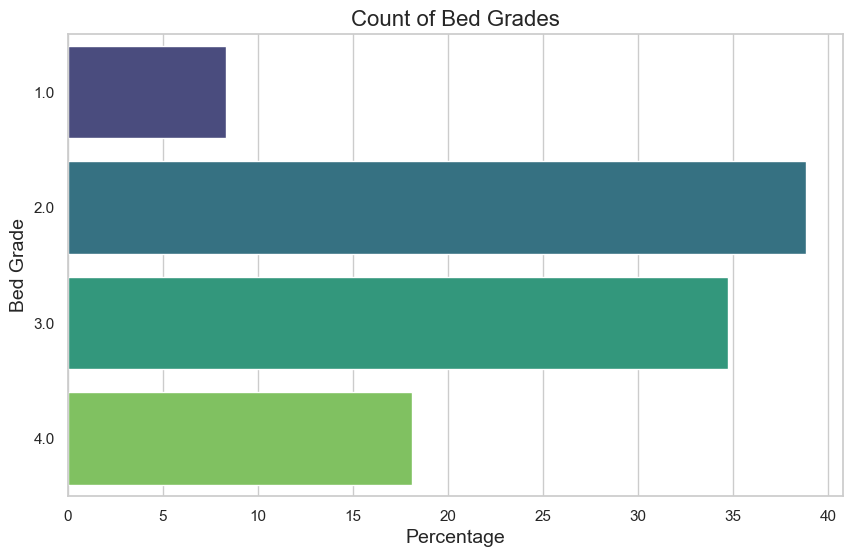

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Severity of Illness'], y=df['Admission_Deposit'], palette='viridis')


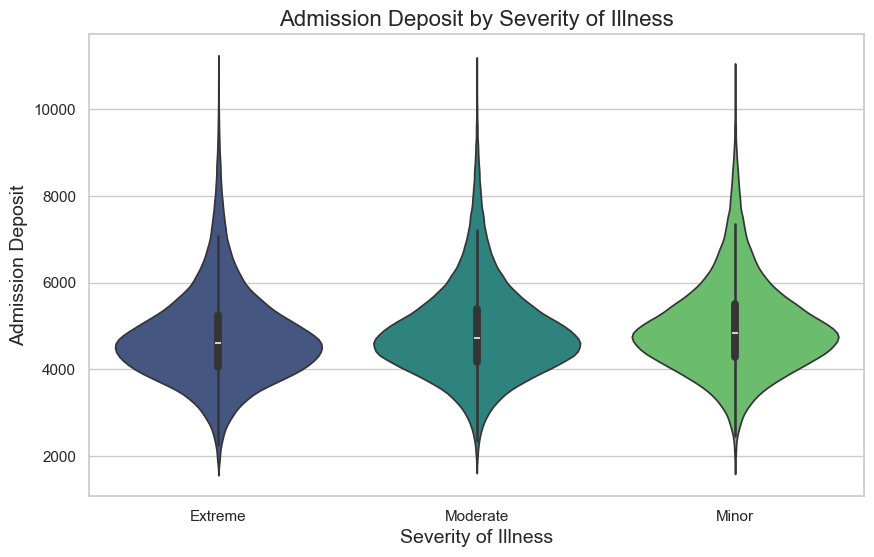

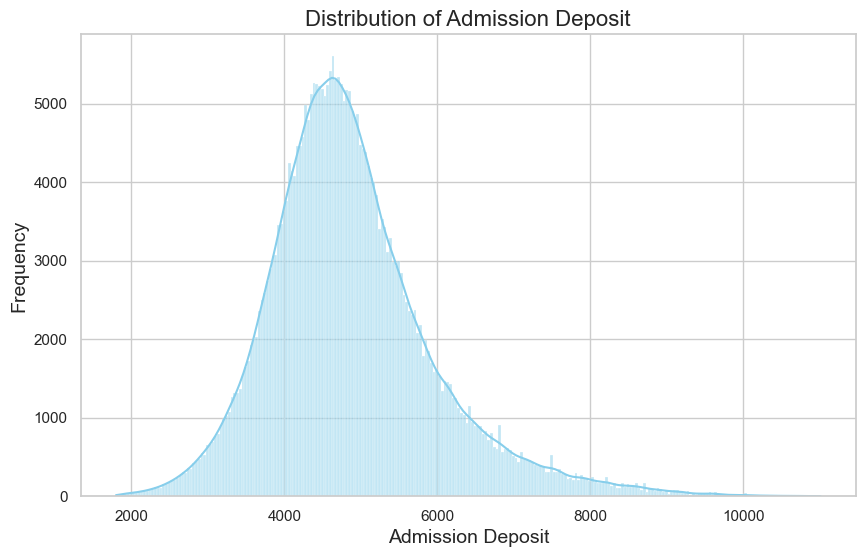

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette='viridis')


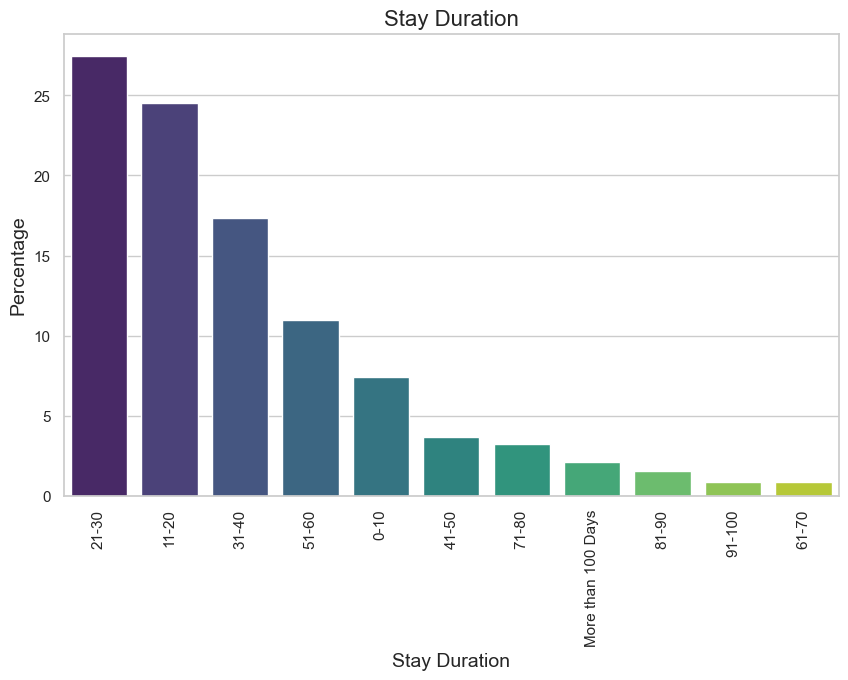

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Stay', palette='viridis')


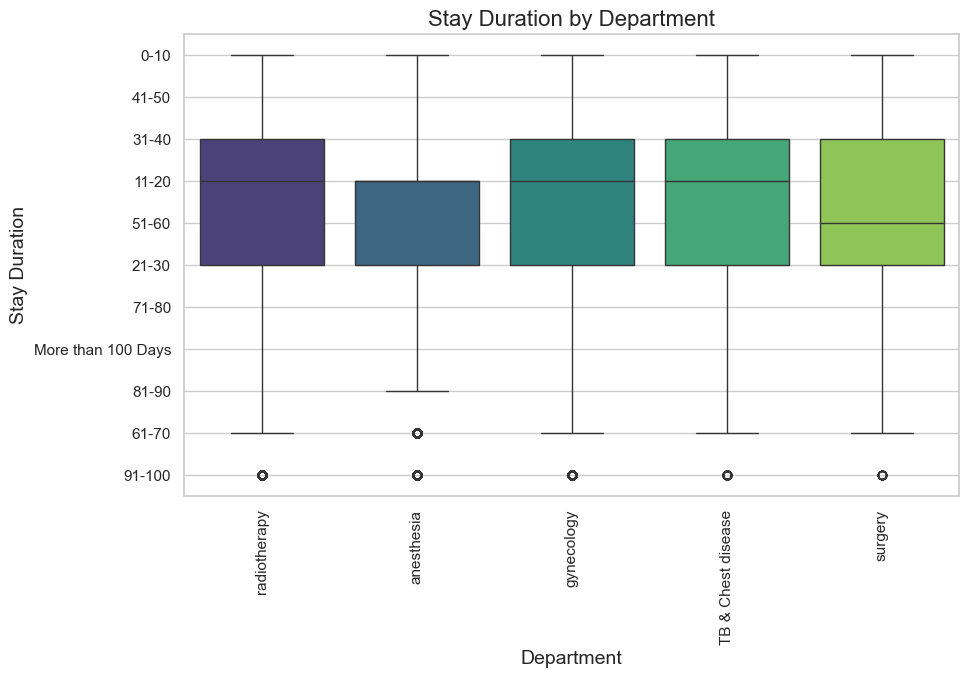

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type of Admission', y='Stay', palette='viridis')


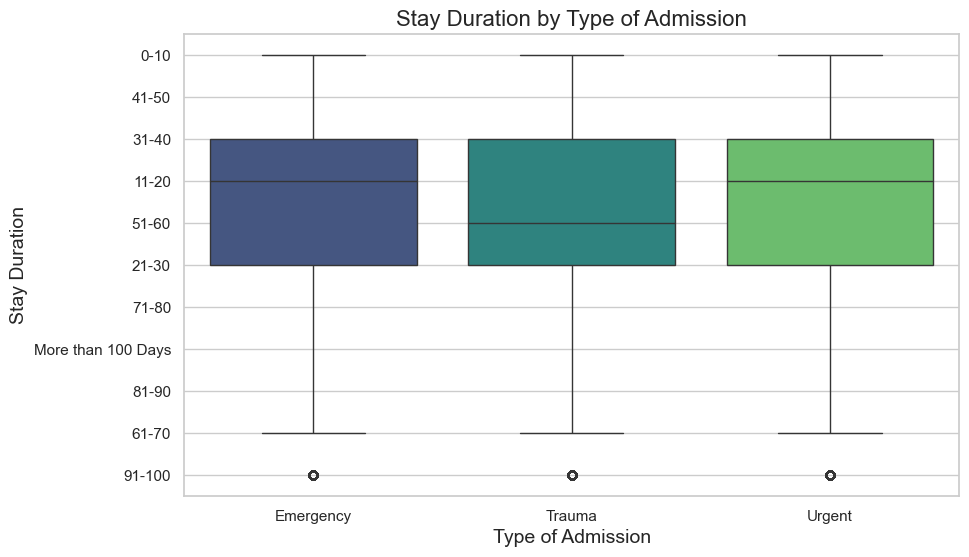

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4712\3335191471.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity of Illness', y='Stay', palette='viridis')


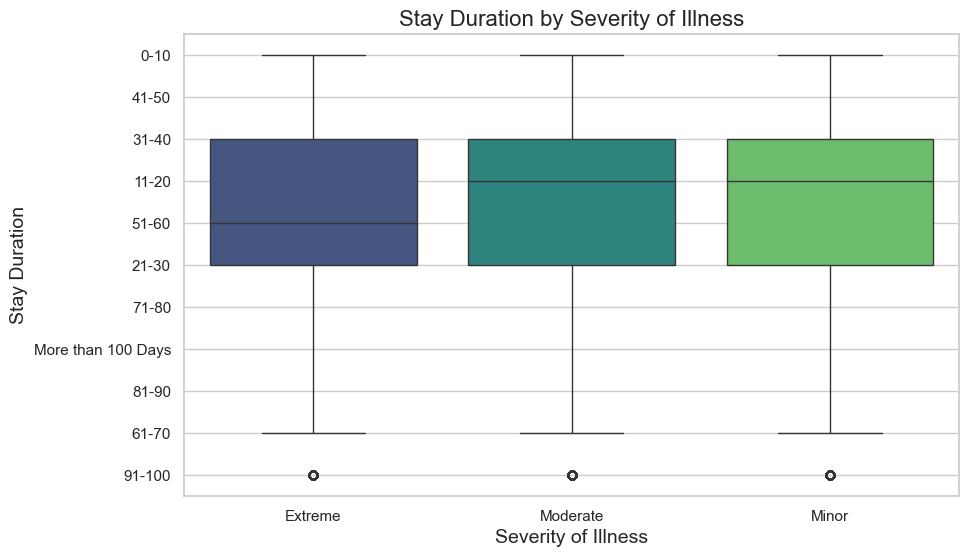

In [7]:
# Set a style for the plots
sns.set(style="whitegrid")

# Function to plot count plots with y-axis as percentage
def plot_percentage_countplot(data, x, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(10, 6))
    count = data[x].value_counts(normalize=True) * 100
    sns.barplot(x=count.index, y=count.values, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    if rotation:
        plt.xticks(rotation=rotation)
    plt.show()

# Plot 1: Count of Available Extra Rooms in Hospital with percentages (Bar Plot)
plot_percentage_countplot(df, 'Available Extra Rooms in Hospital',
                          'Count of Available Extra Rooms in Hospital',
                          'Available Extra Rooms', 'Percentage')

# Plot 2: Count of Departments with percentages (Pie Chart)
plt.figure(figsize=(10, 6))
department_count = df['Department'].value_counts(normalize=True) * 100
plt.pie(department_count, labels=department_count.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(department_count)))
plt.title('Percentage of Departments', fontsize=16)
plt.show()

# Plot 3: Count of Ward Types with percentages (Bar Plot)
plot_percentage_countplot(df, 'Ward_Type', 'Count of Ward Types',
                          'Ward Type', 'Percentage')

# Plot 4: Count of Bed Grades with percentages (Horizontal Bar Plot)
plt.figure(figsize=(10, 6))
bed_grade_count = df['Bed Grade'].value_counts(normalize=True) * 100
sns.barplot(y=bed_grade_count.index, x=bed_grade_count.values, palette='viridis', orient='h')
plt.title('Count of Bed Grades', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Bed Grade', fontsize=14)
plt.show()

# Plot 5: Severity of Illness with percentages (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Severity of Illness'], y=df['Admission_Deposit'], palette='viridis')
plt.title('Admission Deposit by Severity of Illness', fontsize=16)
plt.xlabel('Severity of Illness', fontsize=14)
plt.ylabel('Admission Deposit', fontsize=14)
plt.show()

# Plot 6: Distribution of Admission Deposit (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Admission_Deposit'], kde=True, color='skyblue')
plt.title('Distribution of Admission Deposit', fontsize=16)
plt.xlabel('Admission Deposit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Plot 7: Stay with percentages (Bar Plot)
plot_percentage_countplot(df, 'Stay', 'Stay Duration', 'Stay Duration', 'Percentage', rotation=90)

# Plot 8: Stay Duration by Department (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Stay', palette='viridis')
plt.title('Stay Duration by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Stay Duration', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Plot 9: Stay Duration by Type of Admission (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type of Admission', y='Stay', palette='viridis')
plt.title('Stay Duration by Type of Admission', fontsize=16)
plt.xlabel('Type of Admission', fontsize=14)
plt.ylabel('Stay Duration', fontsize=14)
plt.show()

# Plot 10: Stay Duration by Severity of Illness (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Severity of Illness', y='Stay', palette='viridis')
plt.title('Stay Duration by Severity of Illness', fontsize=16)
plt.xlabel('Severity of Illness', fontsize=14)
plt.ylabel('Stay Duration', fontsize=14)
plt.show()


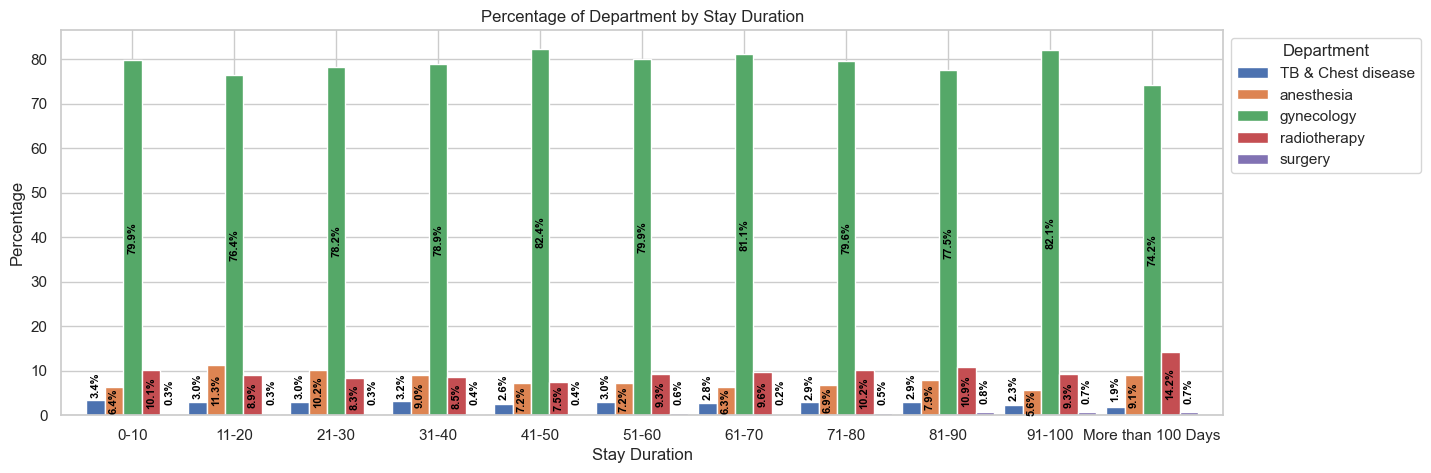

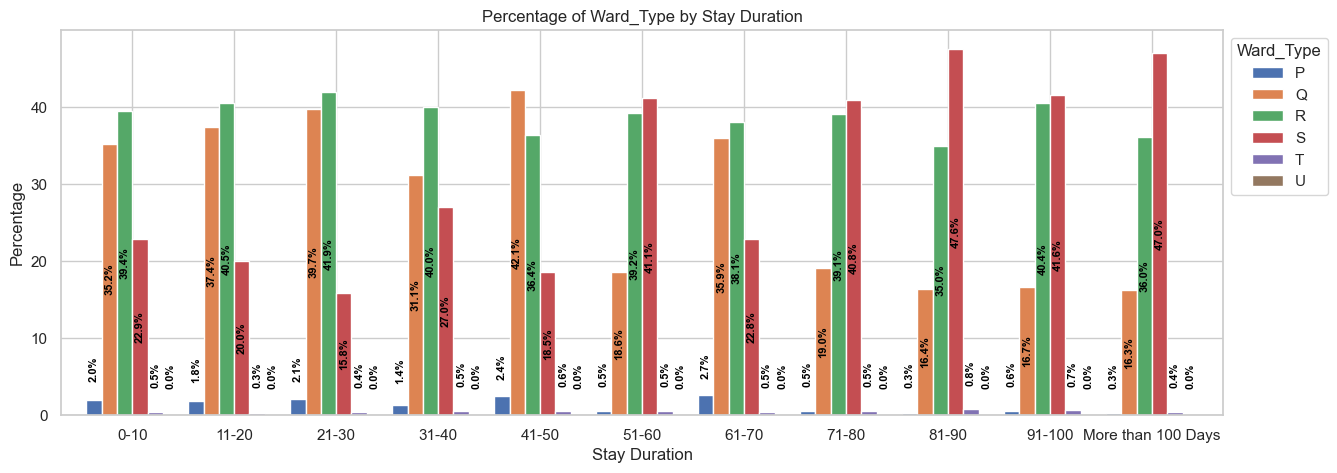

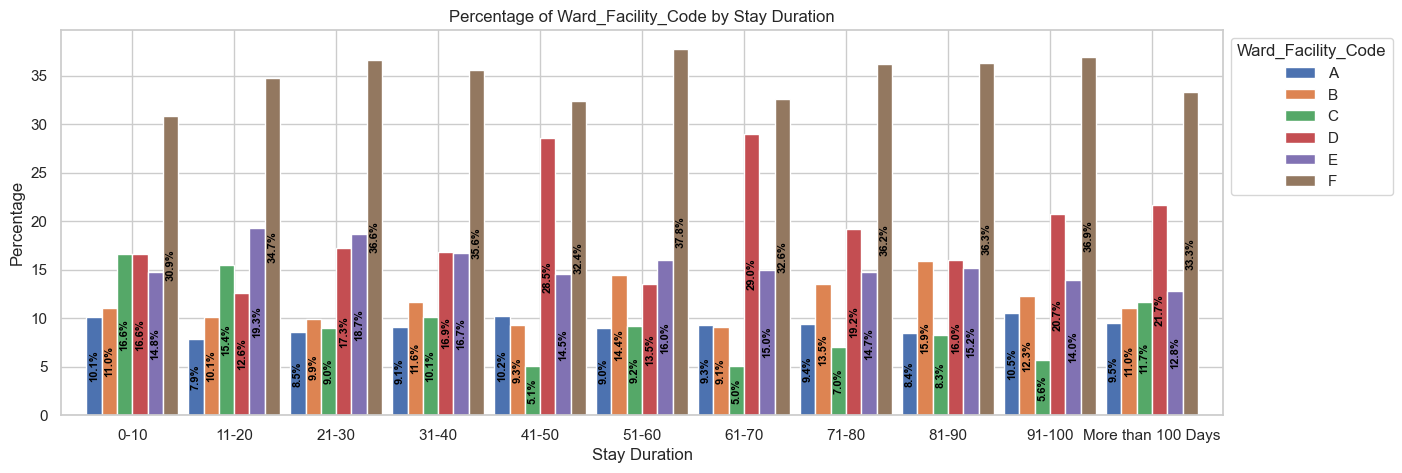

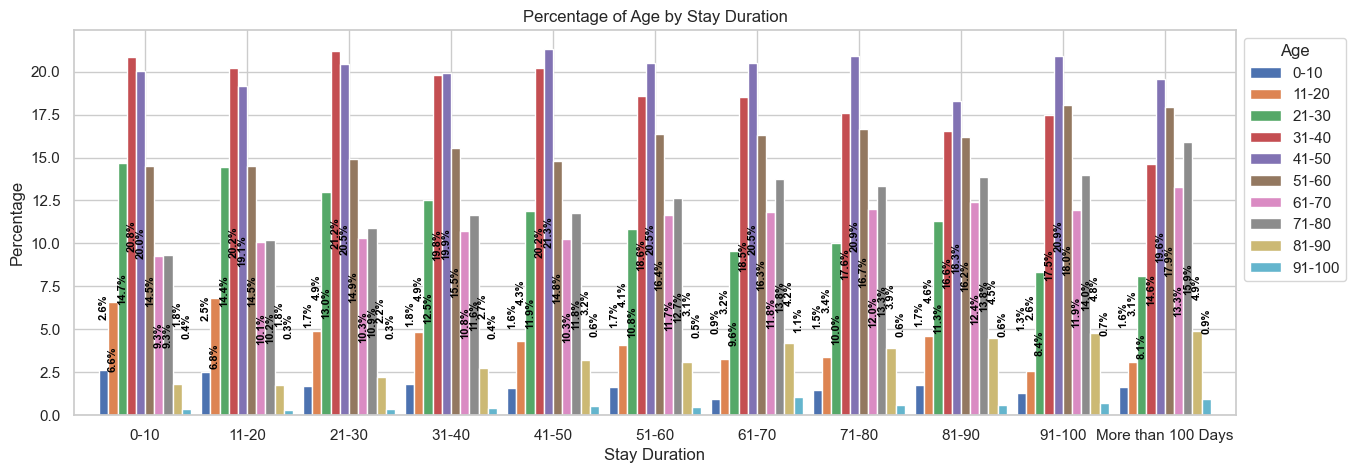

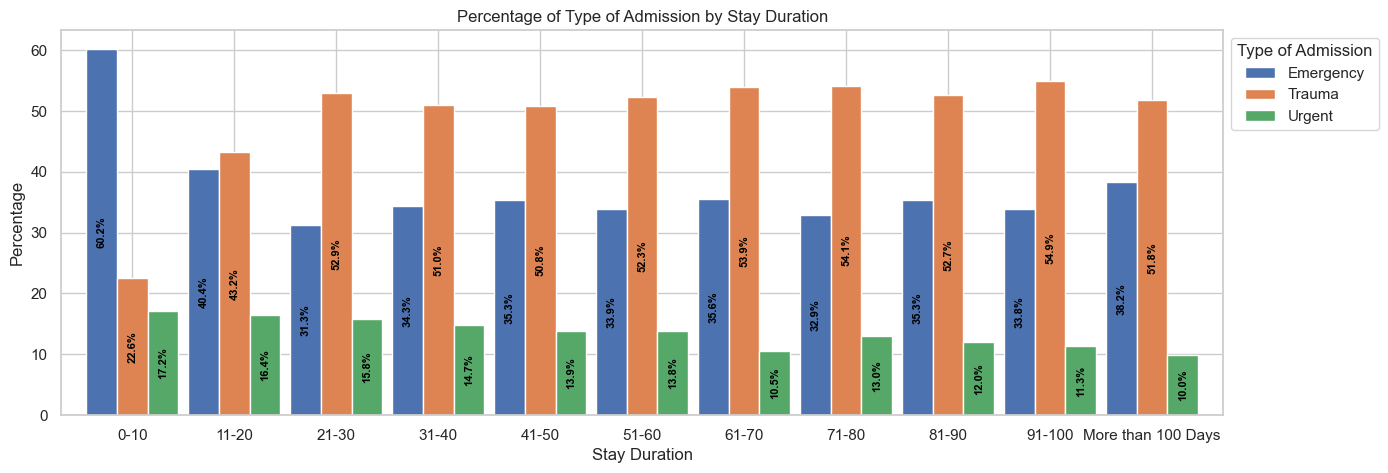

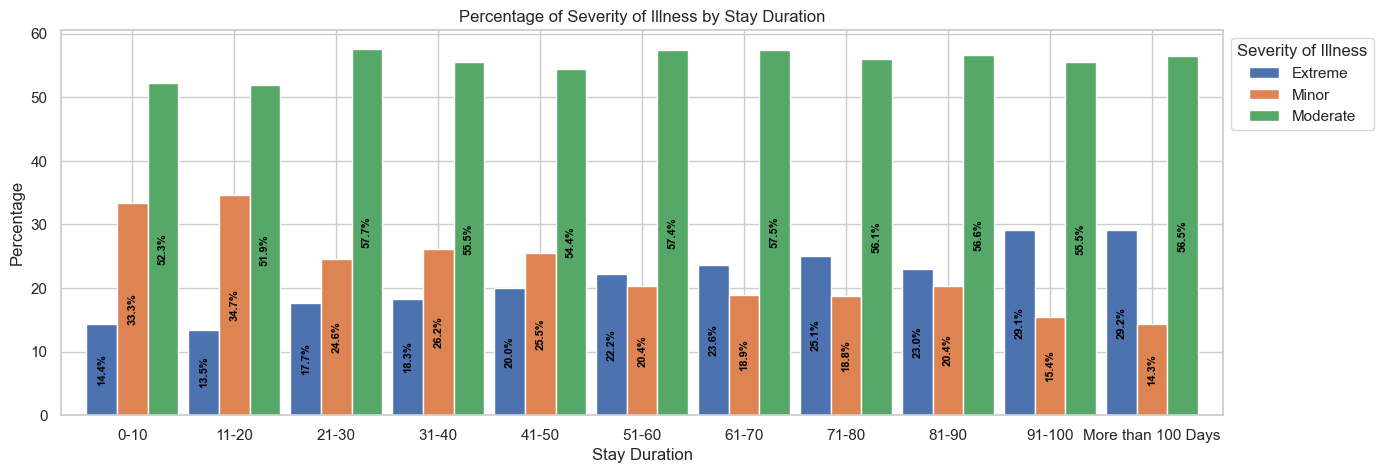

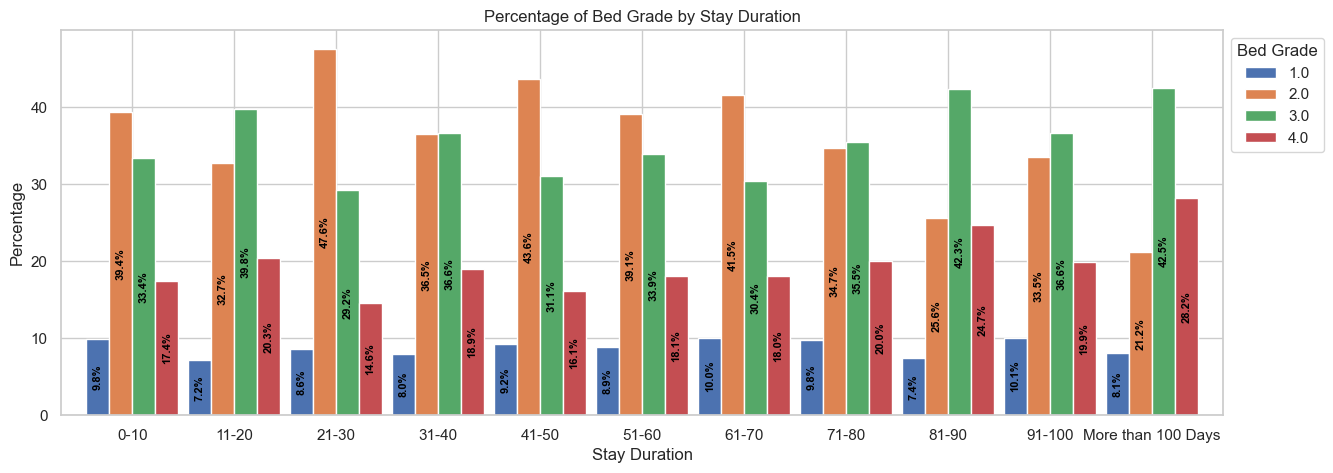

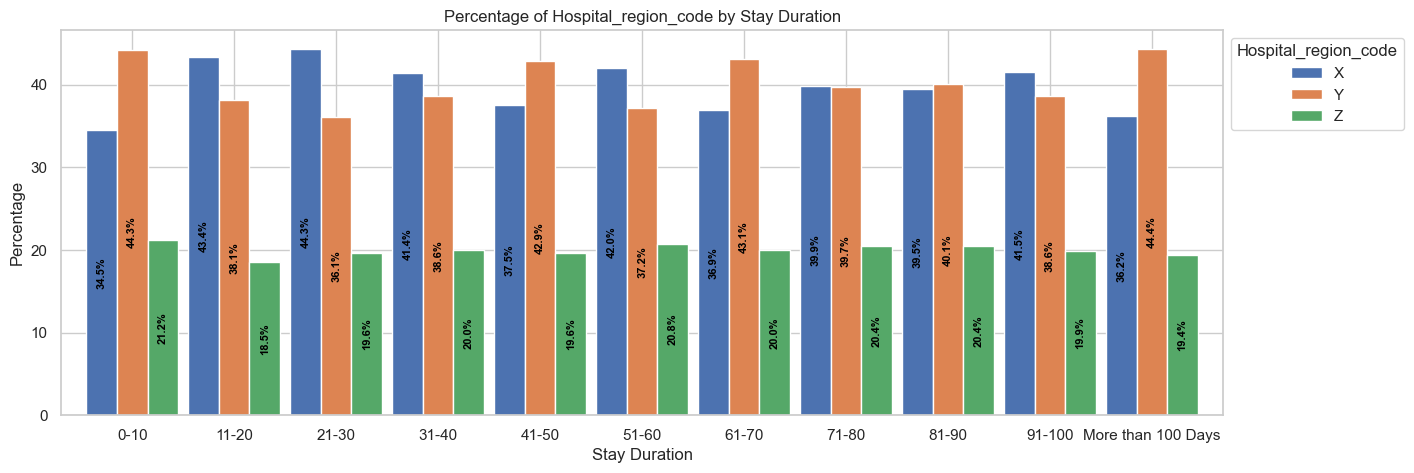

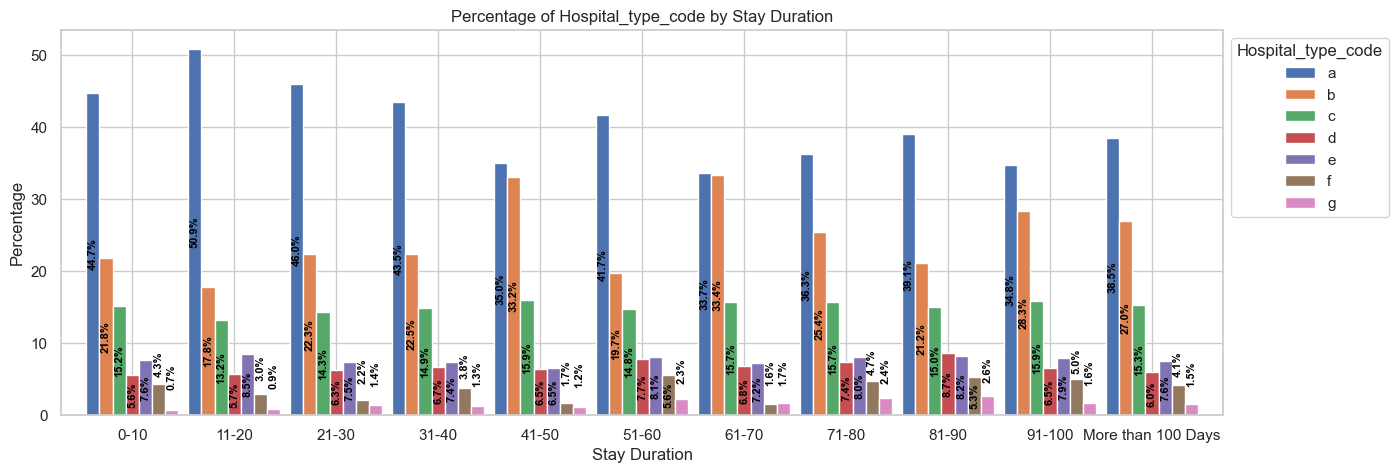

In [8]:
categorical_vars = [ 'Department', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 'Type of Admission', 'Severity of Illness', 
          'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ]
# Iterate over each categorical variable and create a separate stacked bar chart
for i in categorical_vars:
    # plt.figure(figsize=(10, 10))
    stay_order = df['Stay'].unique()
    stay_order.sort()
    
    # Calculate percentage data
    counts = df.groupby(['Stay', i]).size().unstack()
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Plotting
    ax = percentages.plot(kind='bar', stacked=False, width=0.9)
    plt.gcf().set_size_inches(15, 5)

    plt.title(f"Percentage of {i} by Stay Duration")
    plt.xlabel('Stay Duration')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(title=i, bbox_to_anchor=(1, 1))

    # Annotate each bar with percentage values (rotated annotations)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        
        if(height<5):
            height = height
            y=5
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=8, color='black', weight='bold', rotation=90)
        
            # ax.annotate(f'{x + width / 2:.2f} {y + height / 2:.2f}%', (x + width / 2, y + height / 2), 
            #             ha='center', va='center', fontsize=8, color='black', weight='bold', rotation=90)
    plt.subplots_adjust(wspace=0.5)
    # plt.tight_layout()

    plt.show()

In [9]:
# Dropping Unimportatant Features
new_df = df.drop(columns=['case_id','patientid'])

In [10]:
# Converting Bed Grade to Categorical Feature.
def categorize(value):
    if(math.isnan(value) == False):
        return str(value)
    else: 
        return float('NaN')
new_df['Bed Grade'] = new_df['Bed Grade'].apply(categorize).astype('category')

In [11]:
# Finding unique elemenets of each categorical column
for col in new_df.columns:
    try:
        print(f"{col}: {sorted(new_df[col].unique())}")
    except:
        print(f"{col}: {new_df[col].unique()}")

Hospital_code: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
Hospital_type_code: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
City_Code_Hospital: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13]
Hospital_region_code: ['X', 'Y', 'Z']
Available Extra Rooms in Hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 21, 24]
Department: ['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy', 'surgery']
Ward_Type: ['P', 'Q', 'R', 'S', 'T', 'U']
Ward_Facility_Code: ['A', 'B', 'C', 'D', 'E', 'F']
Bed Grade: ['2.0', '3.0', '4.0', '1.0', NaN]
Categories (4, object): ['1.0', '2.0', '3.0', '4.0']
City_Code_Patient: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 13.0, 14.0, nan, 11.0, 12.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0]
Type of Admission: ['Emergency', 'Trauma', 'Urgent']
Severity of Illness: ['Extreme', 'Minor', 'M

In [12]:
# Assuming 'df' is your DataFrame
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [13]:
get_class_dist(df['Stay'])

Class=0-10, n=23604 (7.41%)
Class=41-50, n=11743 (3.69%)
Class=31-40, n=55159 (17.32%)
Class=11-20, n=78139 (24.54%)
Class=51-60, n=35018 (11.00%)
Class=21-30, n=87491 (27.48%)
Class=71-80, n=10254 (3.22%)
Class=More than 100 Days, n=6683 (2.10%)
Class=81-90, n=4838 (1.52%)
Class=61-70, n=2744 (0.86%)
Class=91-100, n=2765 (0.87%)
